In [82]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat


In [90]:
#cargando archivo y nombrando columnas
df=pd.read_csv("manchas.csv",names=["1","2","año-mes","manchas","5","6","7"])


In [91]:
df.head()

,1,2,año-mes,manchas,5,6,7
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN


In [92]:
#borrando columnas que no son relevantes
del df['1']
del df['2']
del df['5']
del df['6']
del df['7']

In [93]:
df.head()

,año-mes,manchas
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7


In [95]:
df.apply(lambda x: sum(x.isnull()),axis=0)

año-mes    0
manchas    0
dtype: int64

In [96]:
df_clean = df.dropna()

In [97]:
df.tail()

,año-mes,manchas
3208,2016.373,52.1
3209,2016.456,20.9
3210,2016.540,32.5
3211,2016.624,50.7
3212,2016.708,44.7


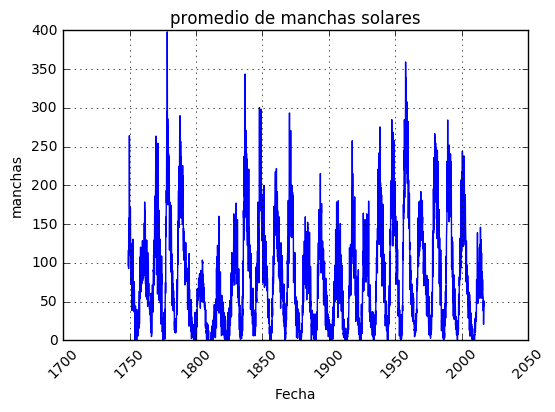

In [100]:
x=df["año-mes"]
y=df["manchas"]
plt.title("promedio de manchas solares")
plt.ylabel('manchas')
plt.xlabel('Fecha')
plt.grid(True)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.plot(x,y)
plt.show()

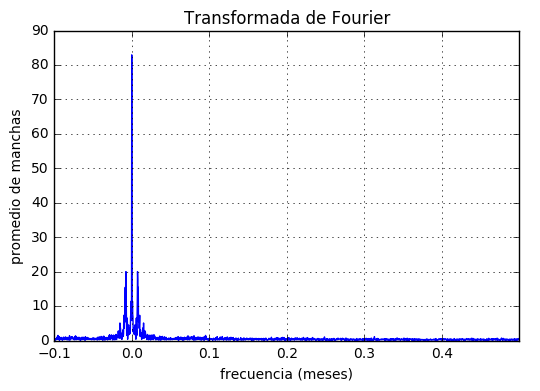

In [170]:
from scipy.fftpack import fft

N = 3213
T = 1.0
x = df['año-mes']
y = df['manchas']

yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1/N * np.abs(yplot))
plt.grid()

plt.xlim(-0.1,.5)
plt.ylim(0,90)

  
plt.title("Transformada de Fourier")
plt.ylabel('promedio de manchas')
plt.xlabel('frecuencia (meses)')

plt.show()

In [171]:
A=yf/N

In [172]:
B=np.absolute(A)
B
print(np.where(B[:,]>5))
B[B[:,]>5]

(array([   0,    1,    2,    3,    4,    5,   18,   19,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   32,   33,   49, 3164, 3180,
       3181, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3194,
       3195, 3208, 3209, 3210, 3211, 3212]),)


array([ 82.92356054,   6.1202308 ,   5.81322464,  11.39959181,
         7.64140607,   6.86795256,   5.12470451,   6.53244749,
         6.2536874 ,  11.33907605,  19.9936166 ,  17.709916  ,
         6.7814543 ,  15.45401894,   5.3662003 ,   7.06077096,
         6.45420329,   5.27672092,   7.31412295,   5.08635154,
         5.08635154,   7.31412295,   5.27672092,   6.45420329,
         7.06077096,   5.3662003 ,  15.45401894,   6.7814543 ,
        17.709916  ,  19.9936166 ,  11.33907605,   6.2536874 ,
         6.53244749,   5.12470451,   6.86795256,   7.64140607,
        11.39959181,   5.81322464,   6.1202308 ])

In [173]:
print( '0')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(N/2 +0),])
print('periodo=', 1/xf[int(N/2 +0),])
print('periodo(años)=', 1/(12*xf[int(N/2 +0),]))
print()
print( '1')
print('Amplitud=',np.absolute(yf[1,]/N))
print('frecuencia=', xf[int(N/2 +1),])
print('periodo=', 1/xf[int(N/2 +1),])
print('periodo(años)=', 1/(12*xf[int(N/2 +1),]))
print()
print( '2')
print('Amplitud=',np.absolute(yf[2,]/N))
print('frecuencia=', xf[int(N/2 +2),])
print('periodo=', 1/xf[int(N/2 +2),])
print('periodo(años)=', 1/(12*xf[int(N/2 +2),]))
print()
print( '3')
print('Amplitud=',np.absolute(yf[3,]/N))
print('frecuencia=', xf[int(N/2 +3),])
print('periodo=', 1/xf[int(N/2 +3),])
print('periodo(años)=', 1/(12*xf[int(N/2 +3),]))
print()
print( '4')
print('Amplitud=',np.absolute(yf[4,]/N))
print('frecuencia=', xf[int(N/2 +4),])
print('periodo=', 1/xf[int(N/2 +4),])
print('periodo(años)=', 1/(12*xf[int(N/2 +4),]))
print()
print( '5')
print('Amplitud=',np.absolute(yf[5,]/N))
print('frecuencia=', xf[int(N/2 +5),])
print('periodo=', 1/xf[int(N/2 +5),])
print('periodo(años)=', 1/(12*xf[int(N/2 +5),]))
print()
print( '6')
print('Amplitud=',np.absolute(yf[18,]/N))
print('frecuencia=', xf[int(N/2 +18),])
print('periodo=', 1/xf[int(N/2 +18),])
print('periodo(años)=', 1/(12*xf[int(N/2 +18),]))
print()
print( '7')
print('Amplitud=',np.absolute(yf[19,]/N))
print('frecuencia=', xf[int(N/2 +19),])
print('periodo=', 1/xf[int(N/2 +19),])
print('periodo(años)=', 1/(12*xf[int(N/2 +19),]))
print()
print( '8')
print('Amplitud=',np.absolute(yf[22,]/N))
print('frecuencia=', xf[int(N/2 +22),])
print('periodo=', 1/xf[int(N/2 +22),])
print('periodo(años)=', 1/(12*xf[int(N/2 +22),]))
print()
print( '9')
print('Amplitud=',np.absolute(yf[23,]/N))
print('frecuencia=', xf[int(N/2 +23),])
print('periodo=', 1/xf[int(N/2 +23),])
print('periodo(años)=', 1/(12*xf[int(N/2 +23),]))
print()
print( '10')
print('Amplitud=',np.absolute(yf[24,]/N))
print('frecuencia=', xf[int(N/2 +24),])
print('periodo=', 1/xf[int(N/2 +24),])
print('periodo(años)=', 1/(12*xf[int(N/2 +24),]))
print()
print( '11')
print('Amplitud=',np.absolute(yf[25,]/N))
print('frecuencia=', xf[int(N/2 +25),])
print('periodo=', 1/xf[int(N/2 +25),])
print('periodo(años)=', 1/(12*xf[int(N/2 +25),]))
print()
print( '12')
print('Amplitud=',np.absolute(yf[26,]/N))
print('frecuencia=', xf[int(N/2 +26),])
print('periodo=', 1/xf[int(N/2 +26),])
print('periodo(años)=', 1/(12*xf[int(N/2 +26),]))
print()
print( '13')
print('Amplitud=',np.absolute(yf[27,]/N))
print('frecuencia=', xf[int(N/2 +27),])
print('periodo=', 1/xf[int(N/2 +27),])
print('periodo(años)=', 1/(12*xf[int(N/2 +27),]))
print()
print( '14')
print('Amplitud=',np.absolute(yf[28,]/N))
print('frecuencia=', xf[int(N/2 +28),])
print('periodo=', 1/xf[int(N/2 +28),])
print('periodo(años)=', 1/(12*xf[int(N/2 +28),]))
print()
print( '15')
print('Amplitud=',np.absolute(yf[29,]/N))
print('frecuencia=', xf[int(N/2 +29),])
print('periodo=', 1/xf[int(N/2 +29),])
print('periodo(años)=', 1/(12*xf[int(N/2 +29),]))
print()
print( '16')
print('Amplitud=',np.absolute(yf[30,]/N))
print('frecuencia=', xf[int(N/2 +30),])
print('periodo=', 1/xf[int(N/2 +30),])
print('periodo(años)=', 1/(12*xf[int(N/2 +30),]))
print()
print( '17')
print('Amplitud=',np.absolute(yf[32,]/N))
print('frecuencia=', xf[int(N/2 +32),])
print('periodo=', 1/xf[int(N/2 +32),])
print('periodo(años)=', 1/(12*xf[int(N/2 +32),]))
print()
print( '18')
print('Amplitud=',np.absolute(yf[33,]/N))
print('frecuencia=', xf[int(N/2 +33),])
print('periodo=', 1/xf[int(N/2 +33),])
print('periodo(años)=', 1/(12*xf[int(N/2 +33),]))
print()
print( '19')
print('Amplitud=',np.absolute(yf[49,]/N))
print('frecuencia=', xf[int(N/2 +49),])
print('periodo=', 1/xf[int(N/2 +49),])
print('periodo(años)=', 1/(12*xf[int(N/2 +49),]))
print()

0
Amplitud= 82.9235605353
frecuencia= 0.0
periodo= inf
periodo(años)= inf

1
Amplitud= 6.12023079759
frecuencia= 0.000311235605353
periodo= 3213.0
periodo(años)= 267.75

2
Amplitud= 5.8132246436
frecuencia= 0.000622471210707
periodo= 1606.5
periodo(años)= 133.875

3
Amplitud= 11.3995918066
frecuencia= 0.00093370681606
periodo= 1071.0
periodo(años)= 89.25

4
Amplitud= 7.64140606831
frecuencia= 0.00124494242141
periodo= 803.25
periodo(años)= 66.9375

5
Amplitud= 6.86795255526
frecuencia= 0.00155617802677
periodo= 642.6
periodo(años)= 53.55

6
Amplitud= 5.12470451341
frecuencia= 0.00560224089636
periodo= 178.5
periodo(años)= 14.875

7
Amplitud= 6.53244749257
frecuencia= 0.00591347650171
periodo= 169.105263158
periodo(años)= 14.0921052632

8
Amplitud= 6.25368739689
frecuencia= 0.00684718331777
periodo= 146.045454545
periodo(años)= 12.1704545455

9
Amplitud= 11.3390760528
frecuencia= 0.00715841892312
periodo= 139.695652174
periodo(años)= 11.6413043478

10
Amplitud= 19.9936166043
frecuencia=

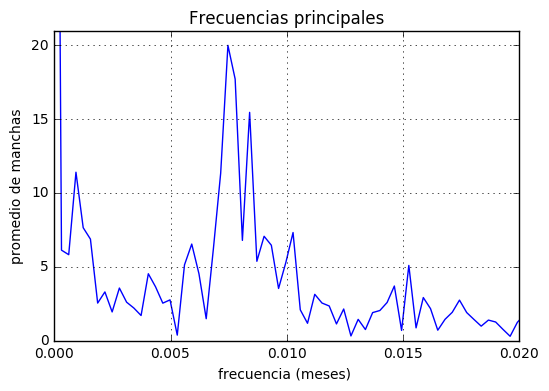

In [175]:
from scipy.fftpack import fft

N = 3213
T = 1.0
x = df['año-mes']
y = df['manchas']

yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1/N * np.abs(yplot))
plt.grid()

plt.xlim(0,.02)
plt.ylim(0,21)

  
plt.title("Frecuencias principales")
plt.ylabel('promedio de manchas')
plt.xlabel('frecuencia (meses) ')

plt.show()

In [169]:
print('periodo(años) promedio = 10.5365')

periodo(años) promedio = 11.1437
